In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
import markov_clustering as mc
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import random

# si salta el error de [module 'scipy.sparse' has no attribute 'coo_array']
# pip install scipy==1.8.1
# pip install --upgrade scipy networkx
# downgrade networkx to 2.6.3 and it solved this problem for me.

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [11]:
np.random.seed(0)

# number of nodes to use
numnodes = 400

# generate random positions as a dictionary where the key is the node id and the value
# is a tuple containing 2D coordinates
positions = {i:(random.random() * 2 - 1, random.random() * 2 - 1) for i in range(numnodes)}

# use networkx to generate the graph
network = nx.random_geometric_graph(numnodes, 0.3, pos=positions)

# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_matrix(network)

calculating optics algorithm
target number of clusters: 10
Inflation: 1.1
number of clusters: 0
0




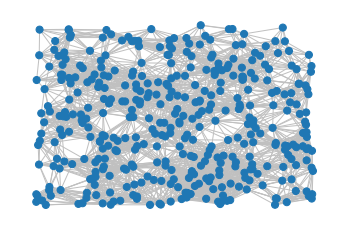

calculating optics algorithm
target number of clusters: 10
Inflation: 1.2000000000000002
number of clusters: 1
1




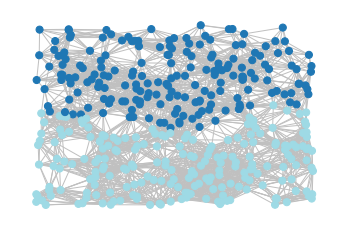

calculating optics algorithm
target number of clusters: 10
Inflation: 1.3000000000000003
number of clusters: 2
2




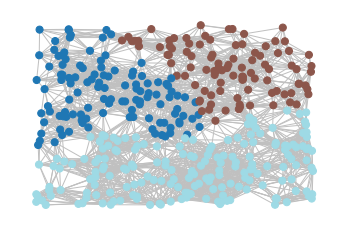

calculating optics algorithm
target number of clusters: 10
Inflation: 1.4000000000000004
number of clusters: 3
3




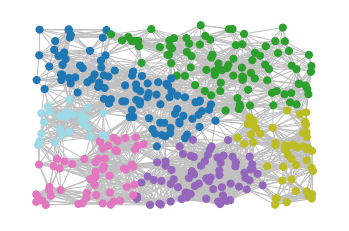

calculating optics algorithm
target number of clusters: 10
Inflation: 1.5000000000000004
number of clusters: 6
6




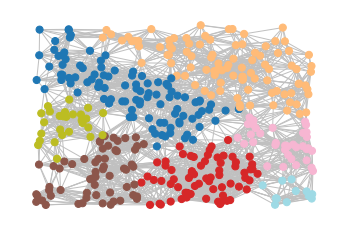

calculating optics algorithm
target number of clusters: 10
Inflation: 1.6000000000000005
number of clusters: 7
7




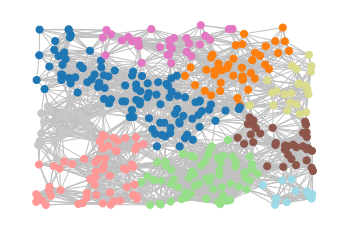

calculating optics algorithm
target number of clusters: 10
Inflation: 1.7000000000000006
number of clusters: 9
9




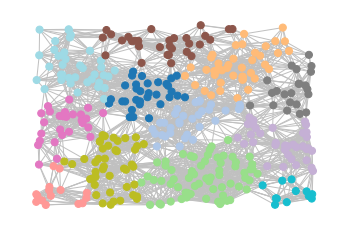

calculating dbscan algorithm
target number of clusters: 10
Inflation: 2.7000000000000006
number of clusters: 12
clusters
[(0, 32, 35, 38, 56, 69, 82, 94, 101, 137, 138, 142, 154, 175, 189, 190, 195, 204, 234, 239, 281, 282, 285, 295, 331, 346, 347, 357, 363, 371, 381, 395), (1, 26, 30, 34, 53, 66, 78, 97, 136, 139, 150, 153, 207, 217, 220, 226, 229, 231, 252, 256, 262, 283, 306, 312, 317, 330, 336, 343, 350, 352, 360, 380), (2, 5, 13, 14, 15, 27, 50, 84, 100, 107, 111, 119, 122, 129, 157, 158, 163, 183, 187, 191, 202, 203, 212, 215, 222, 223, 233, 249, 275, 280, 284, 290, 293, 294, 297, 311, 321, 323, 327, 334, 345, 355, 362, 394), (3, 6, 8, 16, 18, 37, 40, 47, 54, 55, 57, 60, 65, 71, 73, 74, 75, 81, 88, 90, 95, 99, 103, 106, 108, 109, 112, 117, 133, 140, 148, 162, 166, 167, 171, 176, 185, 186, 210, 213, 219, 230, 236, 241, 244, 245, 247, 253, 254, 268, 274, 277, 289, 307, 309, 314, 329, 333, 338, 351, 354, 356, 359, 379, 386, 390, 393, 397), (4, 11, 25, 48, 120, 135, 179, 184, 216, 23

In [18]:
# Inflation affects the granularity or resolution of the clustering outcome, with low values (1.3, 1.4) leading to fewer and larger clusters and high values (5, 6) leading to more and smaller clusters; the default value of 2 is a good starting point.
# https://micans.org/mcl/
# mc.run_mcl(matrix, inflation=1.4)

max_eps = 66
xi = .05

n_clusters = 10

clusters = []
hyperParameter = 1
while len(set(clusters)) < n_clusters and hyperParameter < 20:
    hyperParameter += 0.1
    print("calculating optics algorithm")
    print("target number of clusters: " + str(n_clusters))
    print("Inflation: " + str(hyperParameter))
    # print(matrix)
    print("number of clusters: " + str(len(set(clusters))))
    print(len(set(clusters)))
    print("\n")

    # run
    result = mc.run_mcl(matrix, inflation=hyperParameter)           # run MCL with default parameters
    clusters = mc.get_clusters(result)    # get clusters
    mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")


hyperParameter += 1
print("calculating dbscan algorithm")
print("target number of clusters: " + str(n_clusters))
print("Inflation: " + str(hyperParameter))
# print(matrix)
print("number of clusters: " + str(len(set(clusters))))
print("clusters")
print(clusters)
print("\n")